# **Salary Prediction**

**Problem on hand**:- Given a data set which captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014. Predict the salaries for Employees in Blatimore.


### **OUTLINE**

  1.   Import Datasets
  2.   Data Cleaning and Data Preparation
  3.   Exploratory Data Analysis
  4.   Feature Engineering
  5.   Train Test Split
  6.   Model Building
  7.   Model Evalution




In [1]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for train test split
from sklearn.model_selection import train_test_split

# Import Library for Scaling
from sklearn.preprocessing import StandardScaler

#Import Library for Model Building
from sklearn.linear_model import LinearRegression

# Surpass Warnings
import warnings
warnings.filterwarnings('ignore')


# Importing the Data Set

The data set is in csv format and can be imported using *read_csv* method avaliable in the pandas libraries. Since this is original copy gives it a relevent name when importing.

Also we will be creating weather the data set is correctly imported by checking the top 5 rows of data set

In [2]:
# Import the data set
Salary_org = pd.read_csv("train.csv")

# Print top 5 rows of dataset
Salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06-10-2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


# Data Cleaning and Preparation

In [ ]:
# Check the info of data set
Salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB




*   There are 18981 rows in the data set
*   There are 7 columns in the data set provided
*   All the colimns are of tye Object


#### Its always a good practice to work on copy of data set instead of the Original Data Set itself. Hence Creating a copy of data set





In [ ]:
# Create a copy of data set
Salary_cpy = Salary_org.copy()

In [ ]:
Salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

Since 'Name' has leading space let's remove it. 

In [ ]:
# Remove Leading and trailing edges
Salary_cpy.columns = Salary_cpy.columns.str.strip()  

# print columns after stripping spaces
print("After removing leading and trailling spaces \n", Salary_cpy.columns)

After removing leading and trailling spaces 
 Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


The first and formost step before we jump into Analysis is Treating Null Values.

In [ ]:
# Check Null Values in the data set
Salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

There are null values in HireDate and GrossPay columns. Let's work on each of them.
Tere are 70 null values in HireDate which is less than 1% of values so *dropping those rows*.

In [ ]:
# Reomve rows having empty hire data
Salary_cpy = Salary_cpy.dropna(subset=["HireDate"])

# Check null values
Salary_cpy.isnull().sum() 

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

There are no values in HireDate Column Moving on to GrossPay.

Gross Pay is depending on Annual salary. So these two are interrelated and only one of this can be used as dependent variable. As we have null values in GrossPay.   *dropping that column*

In [ ]:
# Drop GrossPay column
Salary_cpy = Salary_cpy.drop("GrossPay", axis = 1)

# Check null values
Salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

Let us check value counts for all columns

In [ ]:
# Value_counts for AgencyId
Salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1117 agencies in Baltimore. As per general Understanding AgencyID represents an Agency, so we should have same number of Agencies as well.

Lets check the same

In [ ]:
# Value_counts for Agency
Salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

Against general expectations, A single Agency seems to have different Agency ID's which might be given based on job Role and Agency. Let's verify the same

In [ ]:
# Value_counts for JobTitle
Salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: JobTitle, Length: 1073, dtype: int64

There are 1073 Job title that are avilable.

In [ ]:
# Value_counts for HireDate
Salary_cpy.HireDate.value_counts()

05/21/2014    1478
06-10-2013     696
06-12-2012     541
06-07-2011     368
05/29/2014     347
              ... 
02/13/2009       1
08-12-1993       1
02-09-1998       1
05-06-1980       1
10/15/1979       1
Name: HireDate, Length: 4737, dtype: int64



*   More number of people are selected on 05/21/2014
*   Date is in format of MM/DD/YYYY



In [ ]:
# Value_counts for Annual Salary
Salary_cpy.AnnualSalary.value_counts()

$11310.00    4811
$20800.00     325
$29245.00     196
$43999.00     169
$44773.00     162
             ... 
$58227.00       1
$41704.00       1
$44700.00       1
$43000.00       1
$900.00         1
Name: AnnualSalary, Length: 1590, dtype: int64



*   Annual Salary has a dollar sign attached to it we will have to remove it and convert into into integer format.




In [ ]:
Salary_cpy["AnnualSalary"] = Salary_cpy["AnnualSalary"].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
# Value_counts on Annual Salary
Salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
58227.0       1
41704.0       1
44700.0       1
43000.0       1
900.0         1
Name: AnnualSalary, Length: 1590, dtype: int64

Now that we have modified Salary, lets also break the date into year, month and day.

In [ ]:
Salary_cpy['HireDay'] = Salary_cpy['HireDate'].apply(lambda x : (int)(str(x)[3:5]))
Salary_cpy['HireMonth'] = Salary_cpy['HireDate'].apply(lambda x : (int)(str(x)[0:2]))
Salary_cpy['HireYear'] = Salary_cpy['HireDate'].apply(lambda x : (int)(str(x)[6:]))

# Print info to check weather columns are added
Salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


Trimming all categorical columns to make sure there are no leading and trailing spaces and no double space between Words

In [ ]:
# Trim spaces
Salary_cpy['JobTitle'] = Salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  ","  "))
Salary_cpy['AgencyID'] = Salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  ","  "))
Salary_cpy['Agency'] = Salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  ","  "))


It can also be seen that some of the job titles are in Upper case. So with Lower and with mix of both which might effect analysis. So converting them to uppercase and also converting Agency and AgencyID.

In [ ]:
# To Uppercase
Salary_cpy['JobTitle'] = Salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
Salary_cpy['AgencyID'] = Salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
Salary_cpy['Agency'] = Salary_cpy['Agency'].apply(lambda x : str(x).upper())

The last thing left in Data Preparation is outlier Treatment. So lets create Box Plot for Annual Salary and check for outliers

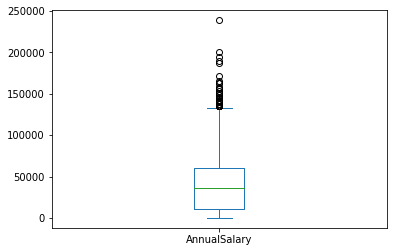

In [ ]:
# Create Box Plot for Annual Salary
Salary_cpy.AnnualSalary.plot.box()
plt.show()



*   There are few Salaries which are way far from other Salaries
*   They might effect the prediction. So we have to eliminate them.

Let's Check the Summary Statistics as well.



In [ ]:
# SUMMARY STATS OF Annual Salary
Salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

As can be seen The max  value way more than mean, median.

Let's delete rows whose annual salary > 150000 according to box plot.

In [ ]:
Salary_cpy = Salary_cpy[Salary_cpy['AnnualSalary']<150000]
Salary_cpy.shape

(18895, 9)

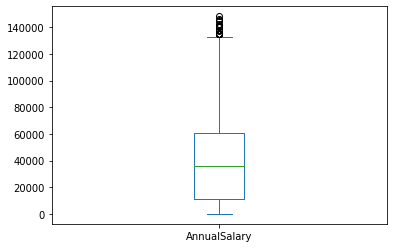

In [ ]:
# Create box Plot for Annual Salary
Salary_cpy.AnnualSalary.plot.box()
plt.show()

All the data points above the 75% line are very close to each other so leaving it as is.

Now that we are done with Data Preparation lets move to next step.

# Exploratory Data Analysis

We will first check the distribution of Annual Salary by creating a *distplot*.

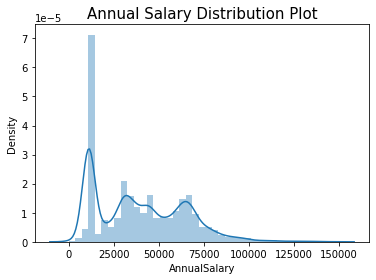

In [ ]:
# Check distribution of Target Variable
sns.distplot(Salary_cpy.AnnualSalary)
plt.title("Annual Salary Distribution Plot", fontsize = 15)
plt.show()



*   The data is distributed very randomly and there seems to be not many people with salary more than 100000.

Let us check jobs for which people are being hired the most. For this we will be creating a *Barplot*.




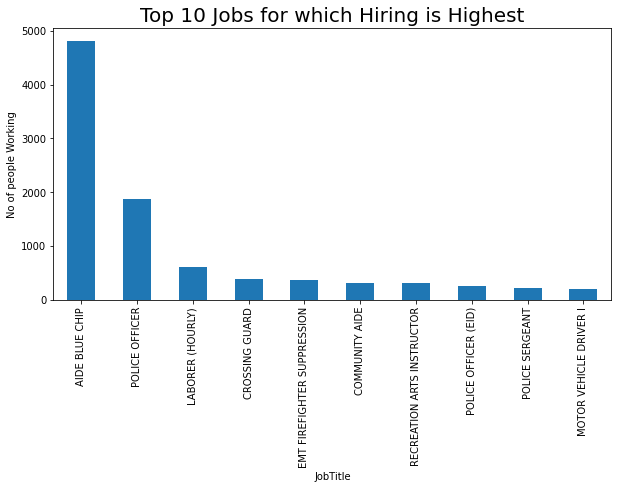

In [ ]:
# Top 10 jobs that based on hirings
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("No of people Working")
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()



*   The above plot clearly shows more number of People are working as AIDE BLUE CHIP which has over double the workers working as POLICE OFFICER which is second highest.
*   All the remaining JobTitles have less than 1000 workers.



Let us check the top 10 Job that fetch the highest Salary.

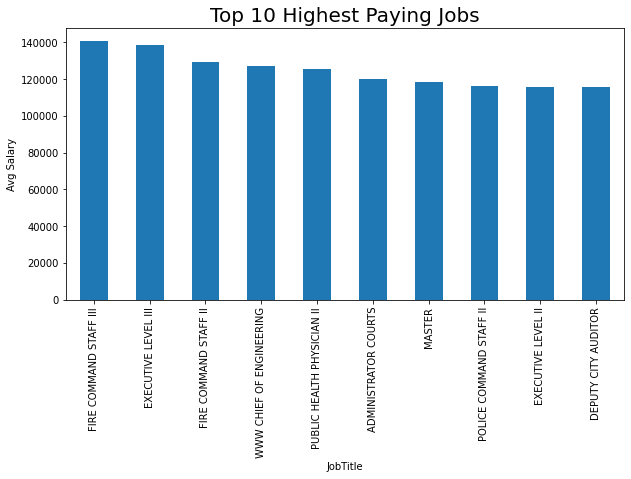

In [ ]:
# Top 10 Jobs that fetch highest Salary
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel("Avg Salary")
plt.title('Top 10 Highest Paying Jobs',fontsize = 20)
plt.show()




*   The above plot clearly shows top 10 Jobs which fetch the highest Salary.

Number of Jobs whose average pay is more than total average salary.



In [ ]:
# Find the mean Salary
mean_sal = Salary_cpy.AnnualSalary.mean()

# Number of Jobs paying more than mean salary
good_pay_jobs = Salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

798



*   Out of 1073 Jobs 798 Jobs pay more than total average Salary.

Let us check the top 10 AgencyID with highest number of employees.



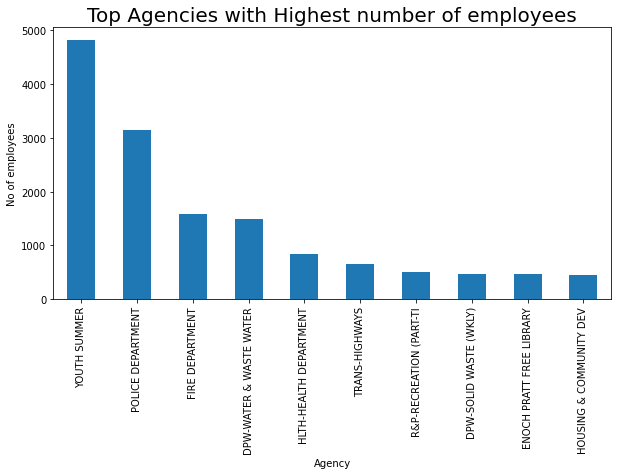

In [ ]:
# Top 10 Agencies that has highest number of employees
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel("No of employees")
plt.title('Top Agencies with Highest number of employees',fontsize = 20)
plt.show()



*   The Youth Summer has maximum number of employees followed by police department.
*   Fire Department and DPW - Water & Waste Water has almost same number of employees.



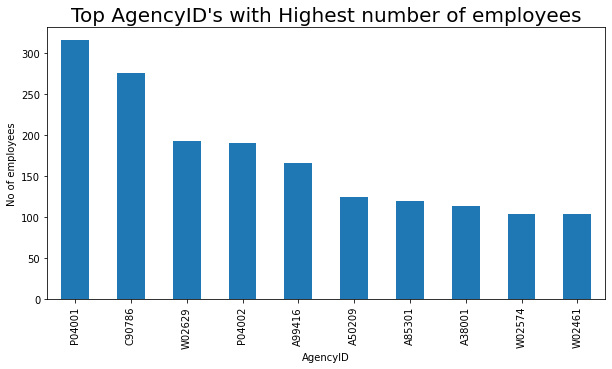

In [ ]:
# Top 10 Jobs that has the highest number of employeees
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.ylabel("No of employees")
plt.title("Top AgencyID's with Highest number of employees",fontsize = 20)
plt.show() 



*   The P04001 has maximum number of employees followed by C90786.

Let check people hired in which year have lowest Salaries. This is to check if as the Hire Year increases the Salary decreases. Because, Salary is high for people who have high experience.


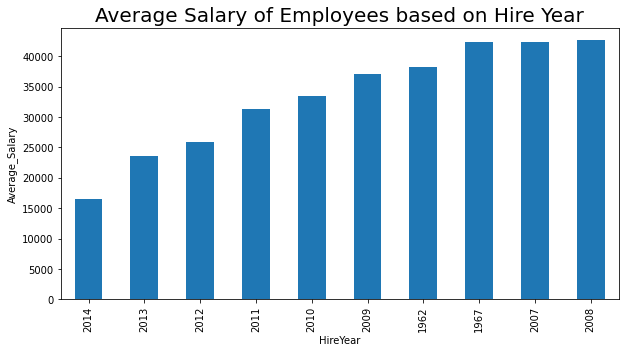

In [ ]:
# Salary vs Hire Year
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel("Average_Salary")
plt.title('Average Salary of Employees based on Hire Year',fontsize = 20)
plt.show()



*   The trend above Suggests that the Salary of the employees increases with experience in the company. Son now lets calaculate experiance in days with Agency. 




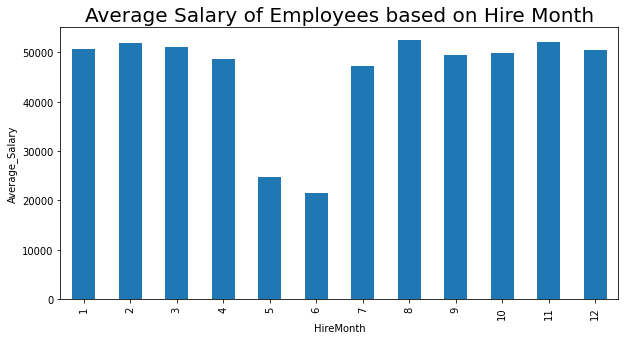

In [ ]:
# Checking if Month Hired has any such effect
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel("Average_Salary")
plt.title('Average Salary of Employees based on Hire Month',fontsize = 20)
plt.show()



*   Except in Month 5 and 6 the distribution is same throughout.
*   This might be because big agencies do not hire during that time.



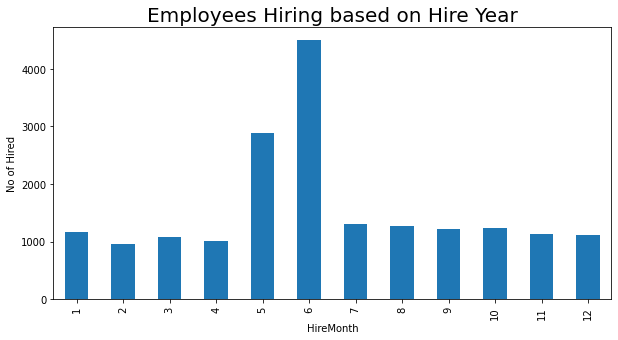

In [ ]:
# Checking on which Month most people are Hired
plt.figure(figsize = (10,5))
Salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel("No of Hired")
plt.title('Employees Hiring based on Hire Year',fontsize = 20)
plt.show()



*   More members are being hired in months of May and June but they have relatively lower average salaries 


Lets check if there is any relation between any of the Numerical variables using *Pairplot*.



<Figure size 1080x1440 with 0 Axes>

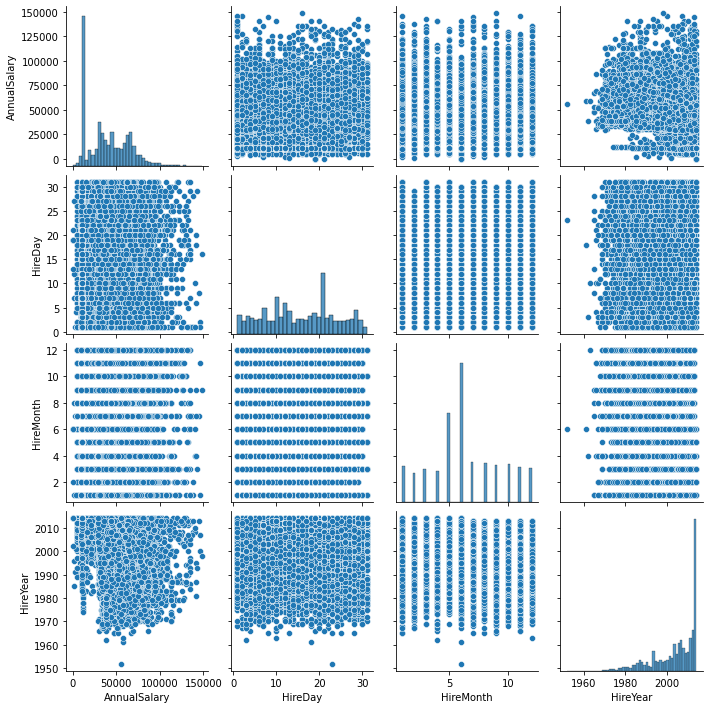

In [ ]:
# Plot a Pair Plot
plt.figure(figsize = (15,20))
sns.pairplot(Salary_cpy)
plt.show()

Nothing seems to have any *correlation*. Lets visualize correlation coefficients using *heatmap*. 

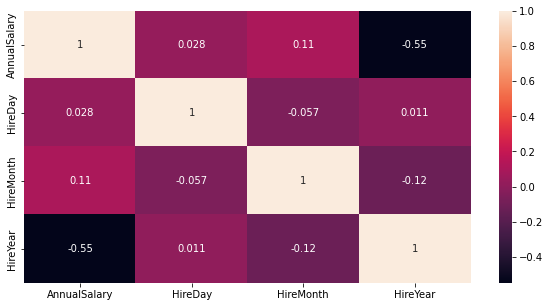

In [ ]:
# Plot a HeatMap
plt.figure(figsize = (10,5))
sns.heatmap(Salary_cpy.corr(),annot = True)

Except for HireYear nothing seems significant correlation with Annual Salary. 

# Feature Engineering

Let us create a copy of data frame to do model building.

In [ ]:
# Create a copy if data frame
Salary_master = Salary_cpy.copy()

Linear Machine Learning models can only work with numerical values. For this reason, it is neccessory to transform the categorical values of the relevent features into numerical ones. This process is called *Feature Encoding*.

Here we will be using Mean encoding. We are using Mean encoding as the number of lables of categorical variables are very high and so using others might either create unneccessary variable or labelling might not be that appropriate. 

In [ ]:
# Apply mean encoding for Job Title
mean_Job = Salary_master.groupby('JobTitle')['AnnualSalary'].mean()
Salary_master['JobTitle'] = Salary_master['JobTitle'].map(mean_Job)

print(Salary_master['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for Agency
mean_Job = Salary_master.groupby('Agency')['AnnualSalary'].mean()
Salary_master['Agency'] = Salary_master['Agency'].map(mean_Job)

print(Salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for AgencyID
mean_Job = Salary_master.groupby('AgencyID')['AnnualSalary'].mean()
Salary_master['AgencyID'] = Salary_master['AgencyID'].map(mean_Job)

print(Salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


We have connected all the required categorical variables to Numerical variables. Lets check if there are any non-numeric variables 

In [ ]:
# Check info
Salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.9+ MB




*   Since we have HireYear, HireMonth and HireDay, we no longer require HireDate field
*   Annual Income is never based on Name, so it is safe to remove both those columns



In [ ]:
# Drop Name and HireDate column
Salary_master = Salary_master.drop(['HireDate','Name'],axis = 1)

# Check Info
Salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB


# Train Test Split

Split into train and test set using *train_test_split*.

In [ ]:
# Split data into train and test sets
Salary_train, Salary_test = train_test_split(Salary_master,train_size = 0.7, random_state = 42)

Check sizes of data to know whether they are split correctly.

In [ ]:
# Shape of train set
print(Salary_train.shape)

# Shape of test set
print(Salary_test.shape)

(13226, 7)
(5669, 7)


Seperate Dependent and independent Variables using *pop*.

In [ ]:
# Divide train set into Department and independent variables
y_train = Salary_train.pop('AnnualSalary')
x_train = Salary_train

# Divide test set into Department and independent variables
y_test = Salary_test.pop('AnnualSalary')
x_test = Salary_test

# Scaling



Scaling is a technique to standardies theindependent features present in the data in a fixed range. We do this to make sure all the features are n same scale

There are two types of scaling :-

*   Standard Scaling
*   MinMax Scaling

Here we will be using Standard Scalar  function of sklearn.





In [ ]:
# Scale the train 
Scaler = StandardScaler()

x_train[x_train.columns] = Scaler.fit_transform(x_train[x_train.columns])

x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,2.224140e-16,-2.721079e-16,-2.433660e-16,-7.252629e-17,9.562725e-17,1.084671e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [ ]:
# Scale the test 
x_test[x_test.columns] = Scaler.transform(x_test[x_test.columns])

x_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


# Model Buiding
 
We are buiding a linear Regression model for this project.

Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. This is used for predicting the independent variables based on relationship between dependent and independent variables. It is a Supervised Learning Technique i.e., it requires historic data to form a relationship.

There are two types of linear Regression :-


1.   Simple Linear Regression
2.   Multiple Linear Regression



1.   Simple Linear Regression:- It predicts a response using a single feature. The assumption in Simple Linear Regression is that the two variables are *linearly related*.

                   h(xi) = b0 + b1*xi1
2.   Multiple Linear Regression:- It is the extension of simple linear regression that predicts a response using two or more features. Mathematiclly we can explain it as follows-

Consider a dataset having n observations, p features i.e. independent variables and y as one response i.e. dependent variable the regression line for p features can be calculated as follows-

            h(xi) = b0 + b1*xi1 + b2*xi2 + ----- + bp*xip
Here h(xi) is the predicated response value and b0, b1, b2,----, bp are tehe regression coefficents.

Let,s see how a Linear Regression works
 




In [ ]:
# Asample Data Frame
example_df = pd.DataFrame({'Performance' : [1, 2, 3, 4, 5, 6], 'Grade' :[2, 5, 4, 6, 1, 3], 'Target': [100, 300, 200, 600, 200, 600]})
example_df
                          

,Performance,Grade,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,600


Let's take an example Salary prediction for Hiring employees and the salary that would be affected is the Target based on independent variables.

Performance which is performance in the interview and Grade being the job Grade they are being hired for.

As discussed Eariler, we have to find relationship between the dependent and independent variable, which is quit easy as we have packages to do the same. Let's build a model to predict the Salaries.


In [ ]:
# Create a model by creating a Linear Regression object
example_lr = LinearRegression()

example_model = example_lr.fit(example_df[['Performance','Grade']],example_df['Target'])

Now that the model is built let us check the coefficients and Intercept

In [ ]:
# Let's have a look at coefficients and Intercept as discribed
print(example_lr.coef_)
print(example_lr.intercept_)

[85. 75.]
-226.66666666666669


It is now understand that the model is generated and its equation can be defined as $-226.6666 + 85*Performance +75*Grade$

But how well or accurate is the predicted values of the model. For any Linear Regression model, we generally use $R^2$ to find the same.

R-squared:- It is a statistical measure that represents the goodness of fit of a regression model. The ideal value for r-square is 1. The closer the value of r-square to 1, the better is the model fitted. So we have to *calcuate R-Squared* for the same.

However this made easy by sklearn and can be calculated as below 

In [ ]:
# Calculate R-Squared
example_model.score(example_df[['Performance','Grade']],example_df['Target'])

0.8271428571428572

So the model we created is able to predict the results with an accccuracy of 82%.

But that's not all, we have to verify if our model satisfies [assumptions of Linear Regression](https://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-are-the-four-assumptions-of-linear-regression/)

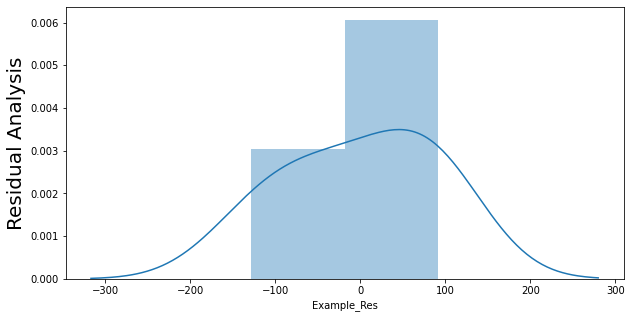

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize = (10,5))
target_pred = example_model.predict(example_df[['Performance','Grade']])
example_res = example_df['Target'] - target_pred
sns.distplot(example_res)
plt.xlabel('Example_Res')
plt.ylabel('Residual Analysis',fontsize = 20)
plt.show()

As can be seen from Terms are Normally Distributed.

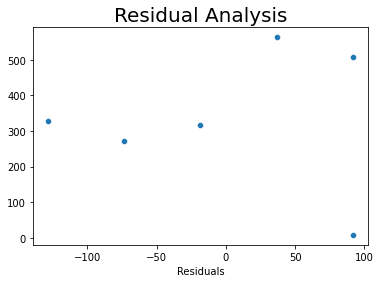

In [ ]:
sns.scatterplot(x = example_res, y = target_pred)
plt.xlabel('Residuals')
plt.title('Residual Analysis',fontsize = 20)
plt.show()

And ther is no specific relation and are independent of each other.

Lets use the same to build our Model.

Generate a Linear Regression Model by passing the X_train and Y_train as inputs.

In [ ]:
# Build the Model
lr = LinearRegression()

Salary_reg = lr.fit(x_train,y_train)

Let us check the R-squared

In [ ]:
# Verify the R^2 Score
Salary_reg.score(x_train,y_train)

0.964833881870778

We get a very high value for R-squared which is very close to 1, which means the independent variables are able to explain 96% of variance in the dependent variable.

# Model Evalution

Even though our model performs well on train data, that dosen't mean the model is a good model. The model should perform equally good on the test data as well, i.e., that the model has not encountered till now.

So lets check how model performs on test data

In [ ]:
# R^2 for test data
Salary_reg.score(x_test,y_test)

0.9634621082754347

The model performs well on the test data as well as well giving on R-squared of 0.963, which indicates the model genreated is a good model and can be used for predicting the Salaries of Employees in Baltimore.

Note:-



*   Here we did not fave any issue of Overfitting even though we used all the columns. But in most models using all the columns will lead to Overfitting which can be addressed by Regression. 

Lets plot distributed plot to chrck whether Residuals satisfy assumptions of Linear Regression



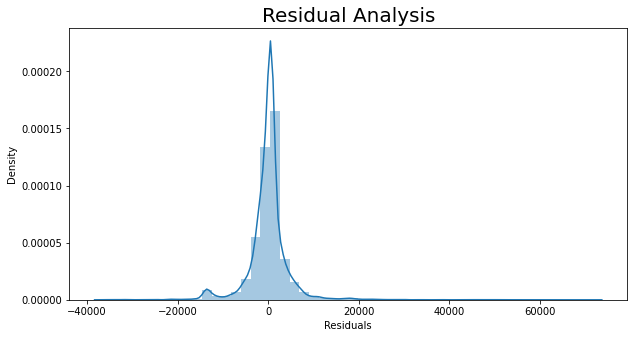

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize = (10,5))
y_train_pred = Salary_reg.predict(x_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title('Residual Analysis',fontsize = 20)
plt.show()



*   The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression.



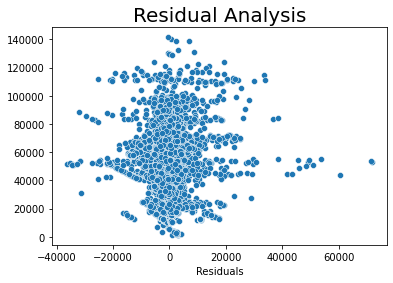

In [ ]:
sns.scatterplot(x=res, y=y_train_pred)
plt.xlabel('Residuals')
plt.title('Residual Analysis',fontsize = 20)
plt.show()



*   The Residuals are independent of each other, which is assumption in Linear Regression.

*The Model has generated can used for Salary prediction. Let us check the coefficients and intercept.*



In [ ]:
# Print Coef
print('Coef are:- ',Salary_reg.coef_)

# Print Intercept
print('Intercept id:- ',Salary_reg.intercept_)

Coef are:-  [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
Intercept id:-  39628.221303493134


*Let us create a model equation and store it in a string*

In [ ]:
model = str(Salary_reg.intercept_)

for i in range(len(Salary_reg.coef_)):
  model = model +' + ' +(str(Salary_reg.coef_[i])) + ' * ' +(str(x_train.columns[i]))

print(model)

39628.221303493134 + 22395.653578510817 * JobTitle + 2798.6775282355734 * AgencyID + -1694.5599365882101 * Agency + -22.591564342892156 * HireDay + -62.65873075557502 * HireMonth + -2049.216012557783 * HireYear


***Observations from Model:-***



*   Of all the fetures given AgencyID, JobTitle and HireYear are the major driver for explaining the variance of Annual Salary as they have higher coefficient.
*   Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.

